In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
!pwd

/Users/neku5162/Desktop/rad_aniso


### We calculate the spherical component of the radaition field tensor to tell us the what the anisotropy in the radiation field is. We show the anisotropy's for 1 snapshot of a muram simulation

$J = \frac{1}{4\pi} \int I_v d\Omega$

$J^2_0 = \frac{1}{2\sqrt{2}} \frac{1}{4\pi} \int I_v (3\mu^2 - 1) + 3 Q_v (\mu^2 - 1) d\Omega$

$Re J^2_1 = \frac{\sqrt{3}}{2} \frac{1}{4\pi} \int \sqrt{1-\mu^2}(-\mu cos\chi (I_v + Q_v) + sin\chi U_v) d\Omega$

$Im J^2_1 = \frac{\sqrt{3}}{2} \frac{1}{4\pi} \int \sqrt{1-\mu^2}(-\mu sin\chi (I_v + Q_v) - cos\chi U_v) d\Omega$

$Re J^2_2 = \frac{\sqrt{3}}{4} \frac{1}{4\pi} \int \lbrack cos(2\chi) \lbrack (1-\mu^2)I_v - (1 + \mu^2)Q_v \rbrack + 2sin(2\chi)\mu U_v\rbrack d\Omega$

$Im J^2_2 = \frac{\sqrt{3}}{4} \frac{1}{4\pi} \int \lbrack sin(2\chi) \lbrack (1-\mu^2)I_v - (1 + \mu^2)Q_v \rbrack - 2cos(2\chi)\mu U_v\rbrack d\Omega$



### where : $\mu = cos\theta$ is the ray's inclination. $\chi$ is the azimuth

In [3]:
J00data = fits.open('muram/J00.fits')
J20data = fits.open('muram/J20.fits')
reJ21data = fits.open('muram/reJ21.fits')
imJ21data = fits.open('muram/imJ21.fits')
reJ22data = fits.open('muram/reJ22.fits')
imJ22data = fits.open('muram/imJ22.fits')

simJ00 = J00data[0].data
simJ20 = J20data[0].data
simreJ21 = reJ21data[0].data
simimJ21 = imJ21data[0].data
simreJ22 = reJ22data[0].data
simimJ22 = imJ22data[0].data

In [4]:
J00data = fits.open('reconstruct/J00.fits')
J20data = fits.open('reconstruct/J20.fits')
reJ21data = fits.open('reconstruct/reJ21.fits')
imJ21data = fits.open('reconstruct/imJ21.fits')
reJ22data = fits.open('reconstruct/reJ22.fits')
imJ22data = fits.open('reconstruct/imJ22.fits')

reconJ00 = J00data[0].data
reconJ20 = J20data[0].data
reconreJ21 = reJ21data[0].data
reconimJ21 = imJ21data[0].data
reconreJ22 = reJ22data[0].data
reconimJ22 = imJ22data[0].data

In [5]:
reconimJ21.shape

(257, 64, 252, 252)

In [6]:
i = 27
wl = 30

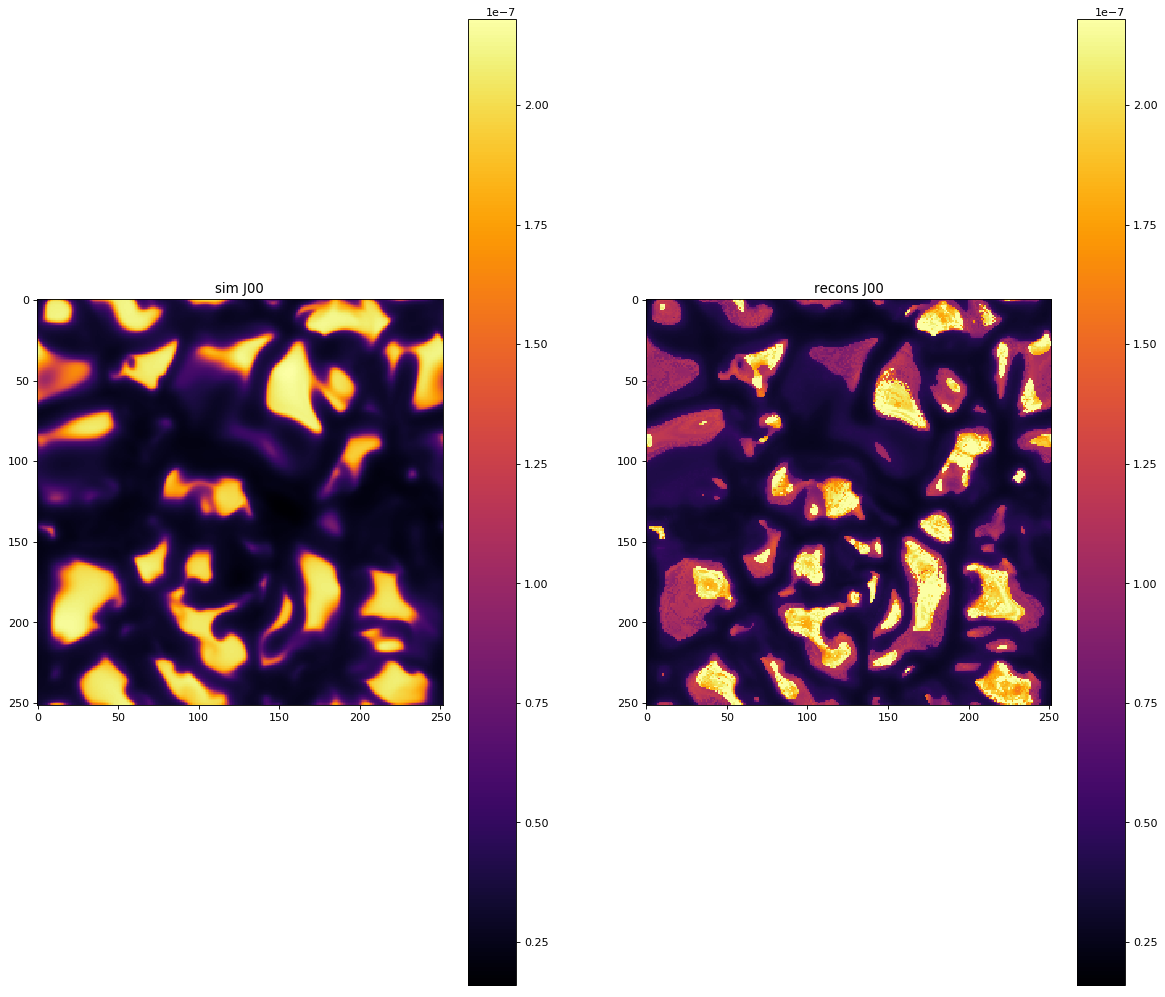

In [7]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simJ00[wl,i,:,:],cmap='inferno')
cup = np.max(simJ00[wl,i,:,:])
clo = np.min(simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim J00')


plt.subplot(1, 2, 2)
plt.imshow(reconJ00[wl,i,:,:],cmap='inferno')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons J00')

rmse = np.sqrt(np.mean(simJ00[wl,i,:,:]))


Text(0.5, 1.0, 'recons J20')

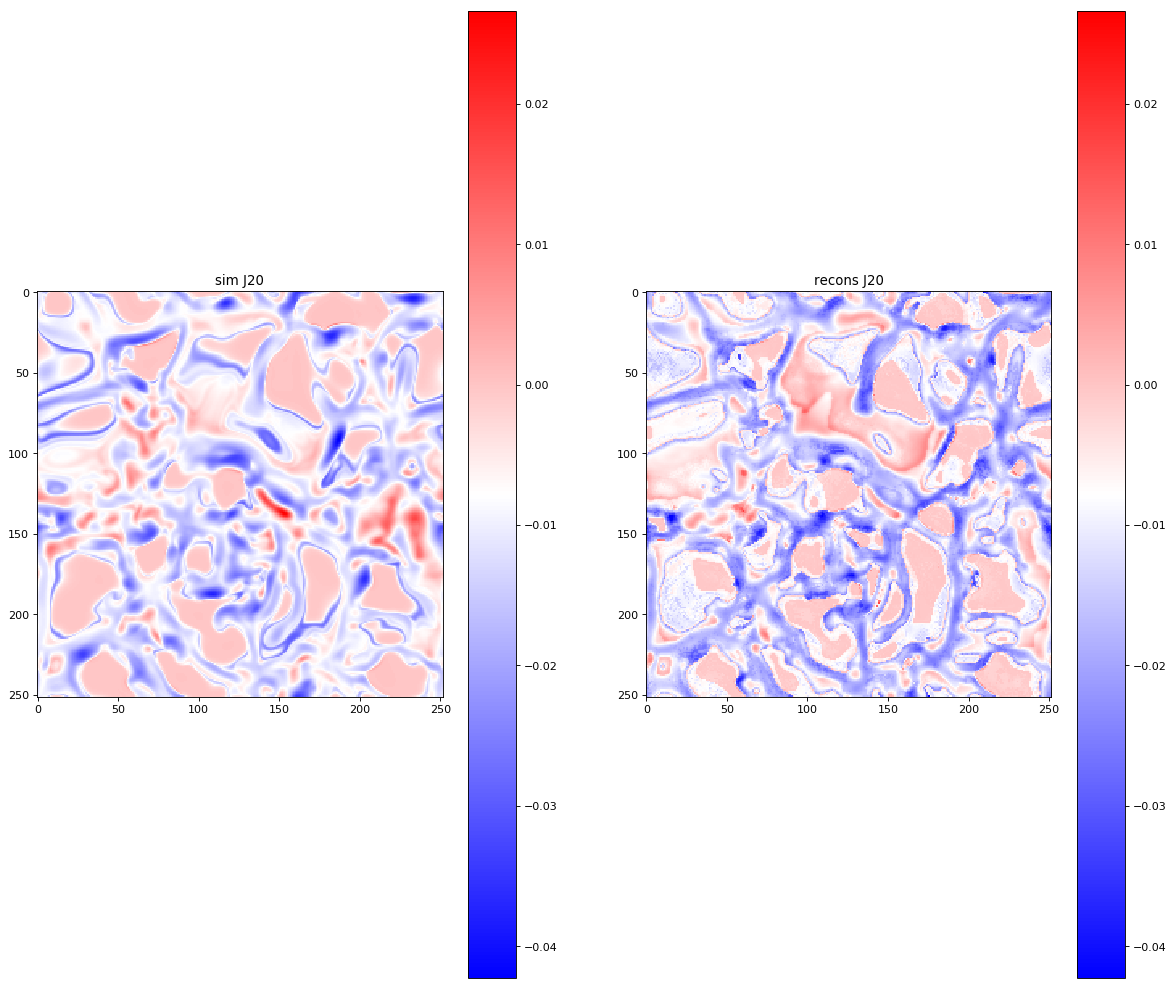

In [8]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simJ20[wl,i,:,:]/simJ00[wl,i,:,:],cmap='bwr')
cup = np.max(simJ20[wl,i,:,:]/simJ00[wl,i,:,:])
clo = np.min(simJ20[wl,i,:,:]/simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim J20')


plt.subplot(1, 2, 2)
plt.imshow(reconJ20[wl,i,:,:]/reconJ00[wl,i,:,:],cmap='bwr')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons J20')




Text(0.5, 1.0, 'recons reJ21')

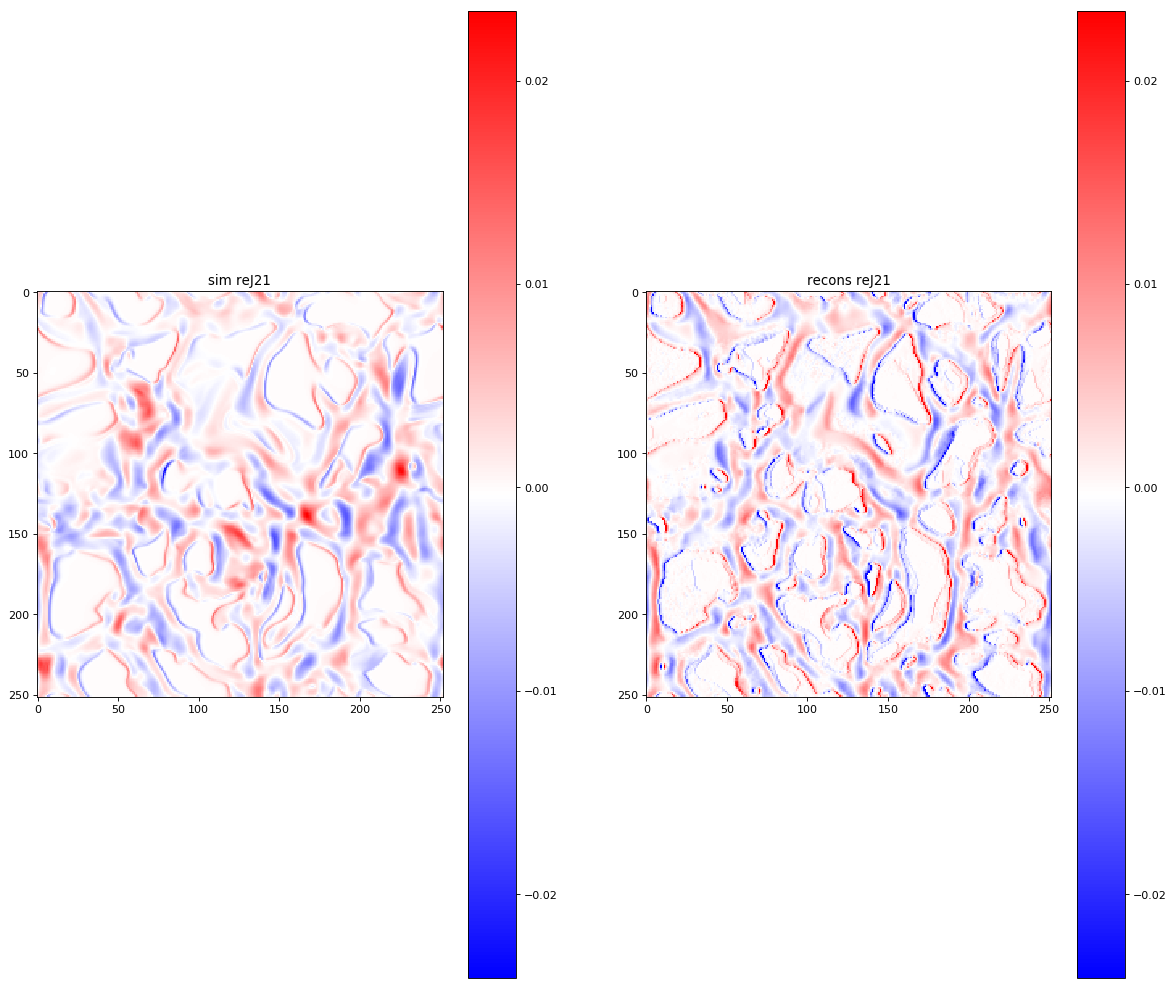

In [9]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simreJ21[wl,i,:,:]/simJ00[wl,i,:,:],cmap='bwr')
cup = np.max(simreJ21[wl,i,:,:]/simJ00[wl,i,:,:])
clo = np.min(simreJ21[wl,i,:,:]/simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim reJ21')


plt.subplot(1, 2, 2)
plt.imshow(reconreJ21[wl,i,:,:]/reconJ00[wl,i,:,:],cmap='bwr')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons reJ21')


Text(0.5, 1.0, 'recons imJ21')

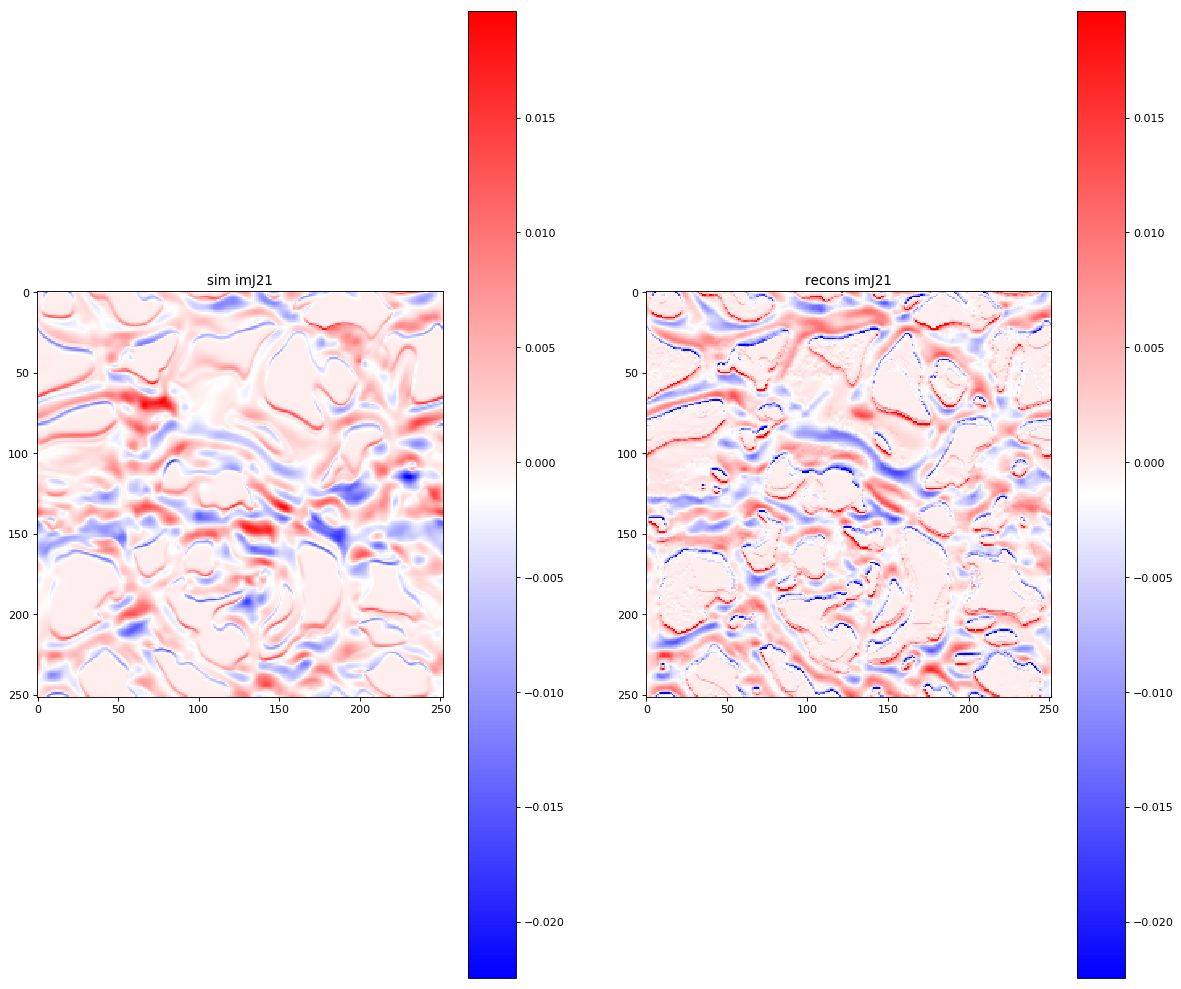

In [10]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simimJ21[wl,i,:,:]/simJ00[wl,i,:,:],cmap='bwr')
cup = np.max(simimJ21[wl,i,:,:]/simJ00[wl,i,:,:])
clo = np.min(simimJ21[wl,i,:,:]/simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim imJ21')


plt.subplot(1, 2, 2)
plt.imshow(reconimJ21[wl,i,:,:]/reconJ00[wl,i,:,:],cmap='bwr')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons imJ21')


Text(0.5, 1.0, 'recons reJ22')

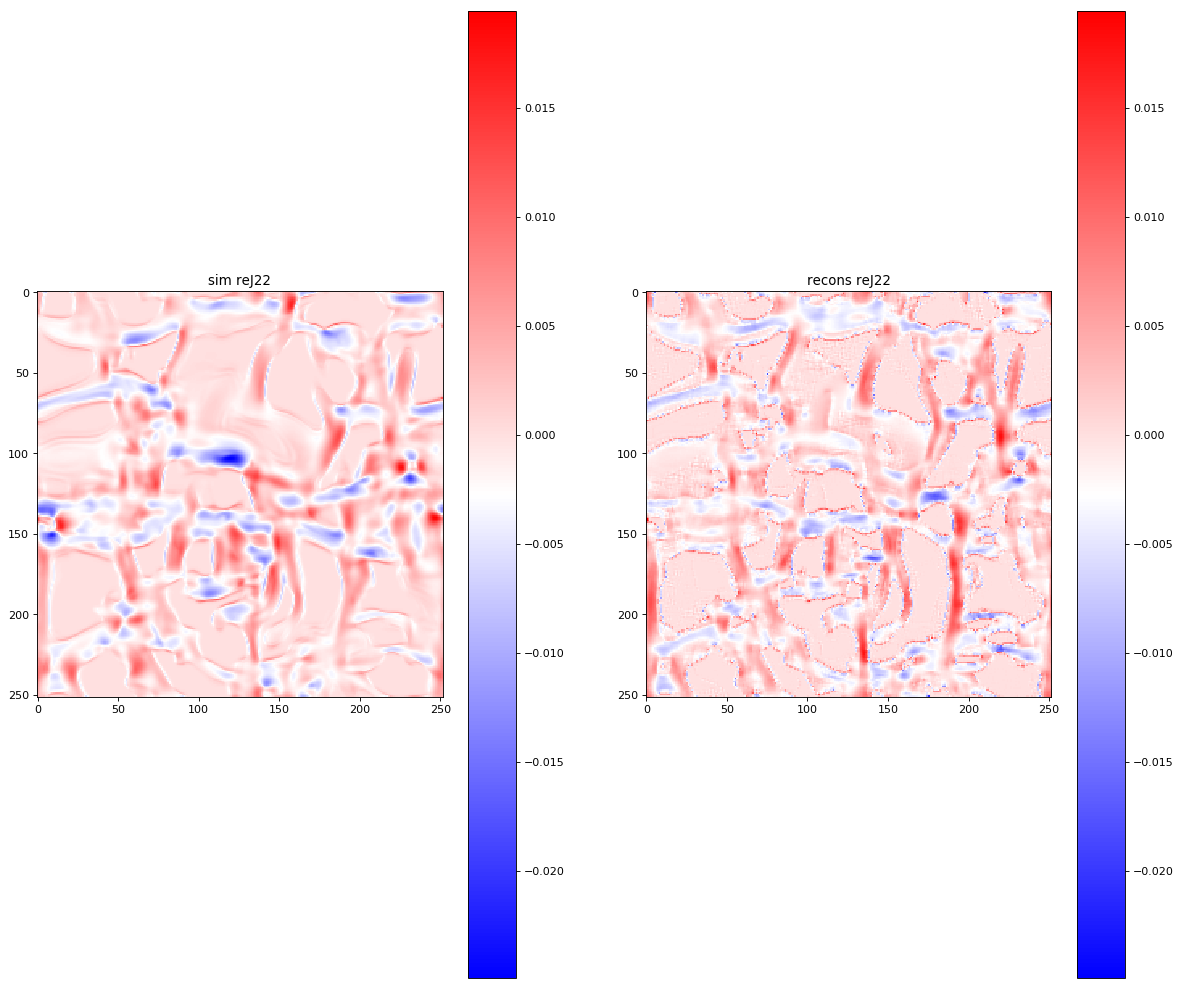

In [11]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simreJ22[wl,i,:,:]/simJ00[wl,i,:,:],cmap='bwr')
cup = np.max(simreJ22[wl,i,:,:]/simJ00[wl,i,:,:])
clo = np.min(simreJ22[wl,i,:,:]/simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim reJ22')


plt.subplot(1, 2, 2)
plt.imshow(reconreJ22[wl,i,:,:]/reconJ00[wl,i,:,:],cmap='bwr')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons reJ22')


Text(0.5, 1.0, 'recons imJ22')

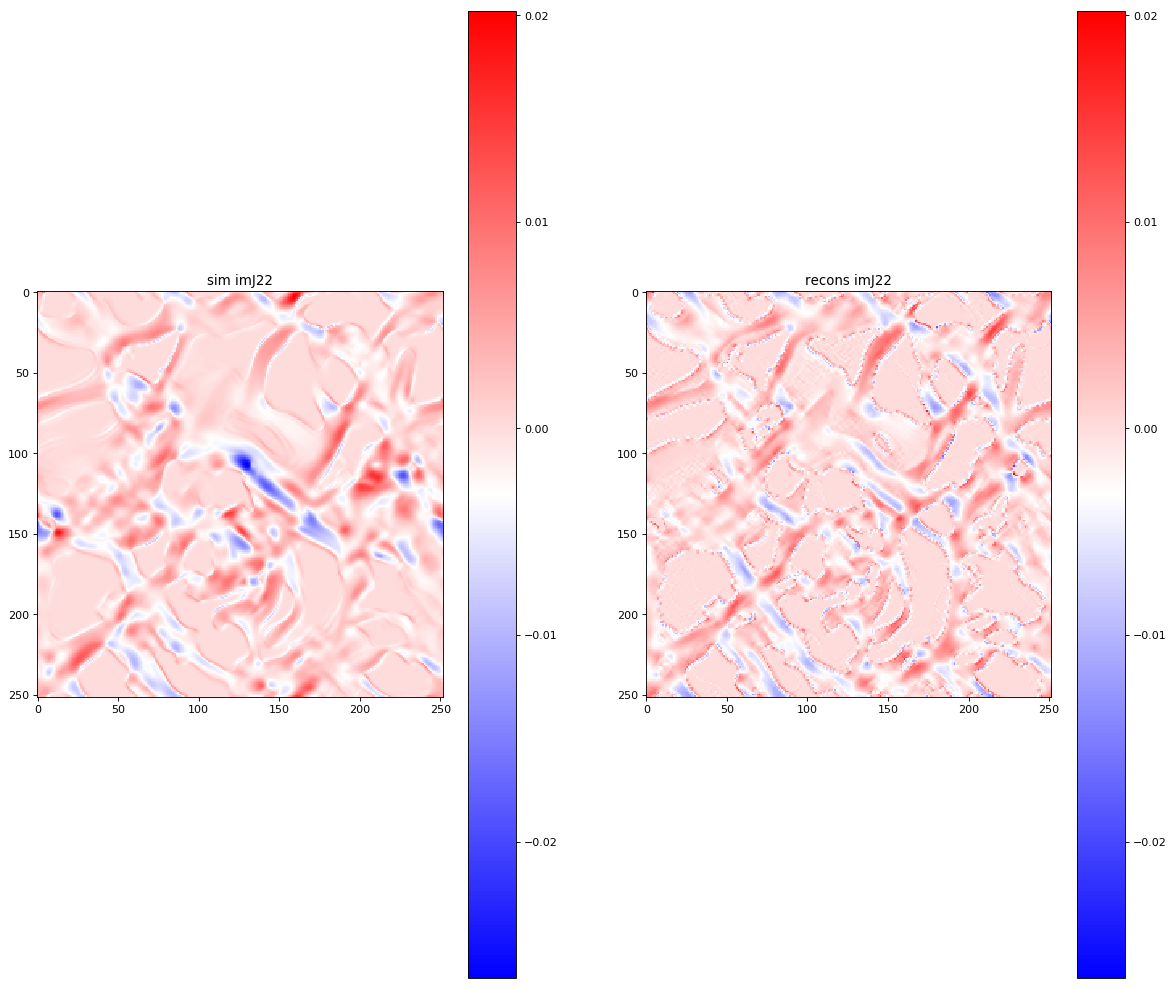

In [16]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)

plt.imshow(simimJ22[wl,i,:,:]/simJ00[wl,i,:,:],cmap='bwr')
cup = np.max(simimJ22[wl,i,:,:]/simJ00[wl,i,:,:])
clo = np.min(simimJ22[wl,i,:,:]/simJ00[wl,i,:,:])
plt.clim(clo,cup)
plt.colorbar()
plt.title('sim imJ22')


plt.subplot(1, 2, 2)
plt.imshow(reconimJ22[wl,i,:,:]/reconJ00[wl,i,:,:],cmap='bwr')
plt.colorbar()
plt.clim(clo,cup)

plt.title('recons imJ22')


# the K means clustering algorithm is doing reasonably well. The main drawback of this algorithm is that it discretely defines the clusters. As a result there are distinct tau vs z profiles for each cluster. This introduces sharp discontinuities near the cluster boundaries. What we want is a smooth interpolation between spectra and tau vs z profiles. We don't want something so rigid and distinct clusters. Ideally, there should be a way to interpolate between the clusters

# Some scatter plots

0.5745644092753448


Text(0, 0.5, 'reconstruction')

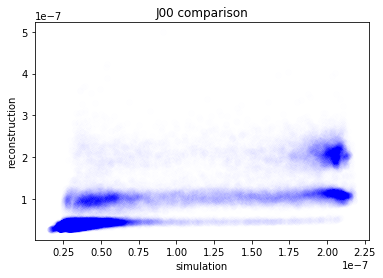

In [15]:
plt.plot(simJ00[wl,i,:,:].flatten(),reconJ00[wl,i,:,:].flatten(),'bo',alpha = 0.002)
print(r2_score(simJ00[wl,i,:,:].flatten(),reconJ00[wl,i,:,:].flatten()))
plt.title('J00 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')

Text(0, 0.5, 'reconstruction')

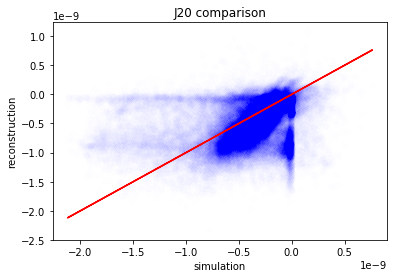

In [147]:
plt.plot(simJ20[wl,i,:,:].flatten(),reconJ20[wl,i,:,:].flatten(),'bo',alpha = 0.002)
plt.plot(simJ20[wl,i,:,:].flatten(),simJ20[wl,i,:,:].flatten(),'r')
plt.title('J20 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')



Text(0, 0.5, 'reconstruction')

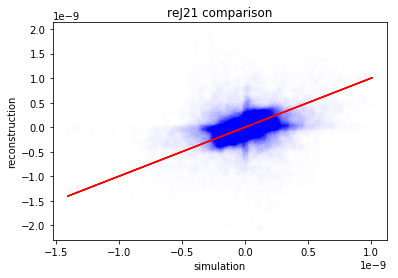

In [149]:
plt.plot(simreJ21[wl,i,:,:].flatten(),reconreJ21[wl,i,:,:].flatten(),'bo',alpha = 0.002)
plt.plot(simreJ21[wl,i,:,:].flatten(),simreJ21[wl,i,:,:].flatten(),'r')
plt.title('reJ21 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')


Text(0, 0.5, 'reconstruction')

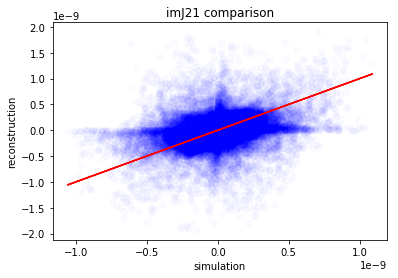

In [150]:
plt.plot(simimJ21[wl,i,:,:].flatten(),reconimJ21[wl,i,:,:].flatten(),'bo',alpha = 0.02,)
plt.plot(simimJ21[wl,i,:,:].flatten(),simimJ21[wl,i,:,:].flatten(),'r')
plt.title('imJ21 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')


Text(0, 0.5, 'reconstruction')

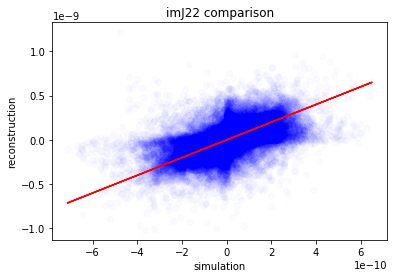

In [151]:
plt.plot(simimJ22[wl,i,:,:].flatten(),reconimJ22[wl,i,:,:].flatten(),'bo',alpha = 0.02,)
plt.plot(simimJ22[wl,i,:,:].flatten(),simimJ22[wl,i,:,:].flatten(),'r')

plt.title('imJ22 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')


Text(0, 0.5, 'reconstruction')

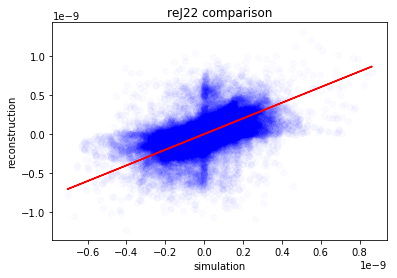

In [152]:

plt.plot(simreJ22[wl,i,:,:].flatten(),reconreJ22[wl,i,:,:].flatten(),'bo',alpha = 0.02,)
plt.plot(simreJ22[wl,i,:,:].flatten(),simreJ22[wl,i,:,:].flatten(),'r')

plt.title('reJ22 comparison')
plt.xlabel('simulation')
plt.ylabel('reconstruction')


# TODO: come up with a way to smoothly interpolate between clusters...